# Census level

A notebook to explore how the census level of RGZ labels varies across the trained SOM

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib as mpl
import numpy as np
from catalog import Pink
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

/Users/gal16b/Documents/Postdoc_Work/PINK/Notebook/catalog.py:6: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/Users/gal16b/miniconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/gal16b/miniconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/gal16b/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/gal16b/miniconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/gal16b/miniconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 486, in start
  

In [2]:
pink = Pink.loader('Script_Experiments_Fractions_Trials/FIRST_Norm_NoLog_3_12x12_Trial0/trained.pink')

In [3]:
cl_csv = '/Users/gal16b/Documents/Postdoc_Work/rgz_rcnn/data/RGZdevkit2017/RGZ2017/ImageSets/Main/full_catalogue.csv'

In [4]:
cl_df = pd.read_csv(cl_csv)
cl_df

catalog_id               first_id  num_cpnts  num_peaks  \
0           72812  FIRSTJ000007.0+081644          1          1   
1           90834  FIRSTJ000224.9+120548          1          1   
2           45645  FIRSTJ000235.0+040644          1          1   
3            8712  FIRSTJ000239.8+105908          1          1   
4            7276  FIRSTJ000315.0+111543          3          3   
5           85641  FIRSTJ000335.9+103613          1          1   
6           22483  FIRSTJ000403.7+060702          2          2   
7           22484  FIRSTJ000403.7+060702          1          1   
8           74826  FIRSTJ000429.0+072335          1          1   
9           84985  FIRSTJ000607.1+105146          1          3   
10          75551  FIRSTJ000652.2+070351          2          2   
11          53081  FIRSTJ000718.7+020510          1          1   
12          75378  FIRSTJ000904.5+070829          2          3   
13          83527  FIRSTJ000919.3+045752          1          3   
14           5160  FIRSTJ000928.2+114120          1          1   
15          74490  FIRSTJ000931.3+073255          1          1   
16          74491  FIRSTJ000931.3+073255          1          1   
17          89478  FIRSTJ000941.5+123720          1          1   
18          89543  FIRSTJ001108.1+123534          1          1   
19          20905  FIRSTJ001113.3+064808          1          1   
20          81921  FIRSTJ001135.1+053613          2          3   
21          86567  FIRSTJ001146.8+101528          1          1   
22           8040  FIRSTJ001151.1+110615          1          1   
23          73927  FIRSTJ001219.9+074838          1          1   
24           7913  FIRSTJ001305.0+110753          1          1   
25           7914  FIRSTJ001305.0+110753          1          1   
26          51962  FIRSTJ001322.2+023806          1          1   
27          85059  FIRSTJ001325.8+104940          1          1   
28          12231  FIRSTJ001356.2+140618          1          1   
29          85281  FIRSTJ001411.8+104459          1          3   
...           ...                    ...        ...        ...   
11806        5022  FIRSTJ232154.3+114252          1          1   
11807        5023  FIRSTJ232154.3+114252          1          1   
11808       57704  FIRSTJ232232.7+093122          1          3   
11809       12075  FIRSTJ232247.8+140900          1          1   
11810       86544  FIRSTJ232301.8+101605          1          1   
11811       57648  FIRSTJ232443.8+093243          1          2   
11812       45902  FIRSTJ232523.7+035945          3          3   
11813       51415  FIRSTJ232553.9+025435          2          3   
11814       10274  FIRSTJ232617.3+143653          1          1   
11815       47289  FIRSTJ232642.9+032312          1          1   
11816       75259  FIRSTJ232806.1+071214          2          3   
11817       46418  FIRSTJ233252.3+034552          1          3   
11818       57950  FIRSTJ233332.6+092522          2          2   
11819       85983  FIRSTJ233335.3+102810          1          3   
11820       89577  FIRSTJ233632.7+123447          1          1   
11821       23361  FIRSTJ233644.0+054357          2          3   
11822       88823  FIRSTJ233731.2+125340          2          3   
11823       22408  FIRSTJ233741.4+060824          1          1   
11824       85798  FIRSTJ234235.1+103235          1          3   
11825       87872  FIRSTJ234253.1+094248          2          2   
11826       53333  FIRSTJ234607.6+015820          2          3   
11827       85384  FIRSTJ234653.3+104243          3          3   
11828        7419  FIRSTJ235103.5+111411          1          1   
11829       88999  FIRSTJ235223.0+124925          1          1   
11830       59621  FIRSTJ235343.8+084152          1          1   
11831        9365  FIRSTJ235357.8+144957          1          1   
11832       53125  FIRSTJ235419.4+020411          2          3   
11833       51356  FIRSTJ235531.5+025603          1          1   
11834       89332  FIRSTJ235627.6+124011       

In [5]:
def reduc_func(s):
    '''Function to acquire the census levels of the objects
    '''
    filename = s.filename.split('_')[0]
    rows = cl_df[cl_df['first_id']==filename]
    res = []
    for k, r in rows.iterrows():
        label = f"{r['num_cpnts']}_{r['num_peaks']}"
        res.append((label, r['cl']))

    return res

In [6]:
book, counts = pink.attribute_heatmap(func=reduc_func, plot=False, realisations=100)

In [7]:
book

defaultdict(list,
            {(1, 6): [[('1_3', 0.928571428571)],
              [('1_3', 0.928571428571)],
              [('1_3', 0.928571428571)],
              [('1_3', 0.928571428571)],
              [('1_3', 0.928571428571)],
              [('1_1', 1.0)],
              [('2_3', 0.8125)],
              [('2_3', 0.8125)],
              [('2_3', 0.8125)],
              [('2_3', 0.8125)],
              [('2_2', 0.7027027027030001)],
              [('2_2', 0.7027027027030001)],
              [('2_2', 0.7027027027030001)],
              [('2_2', 0.7027027027030001)],
              [('1_3', 1.0)],
              [('1_3', 1.0)],
              [('1_3', 1.0)],
              [('1_3', 1.0)],
              [('1_3', 1.0)],
              [('1_3', 1.0)],
              [('1_3', 1.0)],
              [('1_3', 1.0)],
              [('1_3', 1.0)],
              [('1_3', 1.0)],
              [('1_3', 1.0)],
              [('2_3', 0.625)],
              [('2_3', 0.625)],
              [('2_3', 0.625)],
 

In [8]:
ex = book[(0,0)]
labels = list(set([i[0][0] for i in ex if len(i) > 0]))
labels.sort()

/Users/gal16b/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


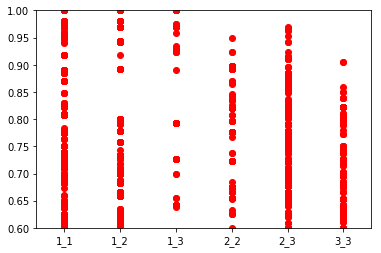

In [9]:
ex = book[(0,0)]
fig, ax = plt.subplots(1,1)
x = [labels.index(i[0][0]) for i in ex if len(i) > 0]
y = [i[0][1] for i in ex if len(i)>0]
ax.plot(x,y,'ro')

ax.set(xlim=[-0.5,5.5], ylim=[0.6,1.])

ax.xaxis.set_ticklabels(['a']+labels)

fig.show()

In [10]:
labels

['1_1', '1_2', '1_3', '2_2', '2_3', '3_3']

In [11]:
def get_shape(book):
    max_shape = 0

    for i in book.keys():
        curr_shape = i[0]*i[1]
        if curr_shape > max_shape:
            max_shape = curr_shape
            shape = i

    return shape

def label_plot(book, shape, save=None, xtick_rotation=None, 
                color_map='gnuplot2', title=None, weights=None, figsize=(6,6),
                literal_path=False, count_text=False):
    '''Isolated function to plot the attribute histogram if the data is labelled in 
    nature

    book - dict
        A dictionary whose keys are the location on the heatmap, and values
        are the list of values of sources who most belonged to that grid
    shape - tuple
        The shape of the grid. Should attempt to get this from the keys or
        possible recreate it like in self.attribute_heatmap() 
    save - None or Str
        If None, show the figure on screen. Otherwise save to the path in save
    xtick_rotation - None or float
        Will rotate the xlabel by rotation
    color_map - str
        The name of the matplotlib.colormap that will be passed directly to matplotlib.pyplot.get_map()
    title - None of str
        A simple title strng passed to fig.suptitle()
    weights - None or dict
        If not None, the dict will have keys corresponding to the labels, and contain the total
        set of counts from the Binary file/book object. This will be used to `weigh` the contribution
        per neuron, to instead be a fraction of dataset type of statistic. 
    figsize - tuple of int
        Size of the figure to produce. Passed directly to plt.subplots
    literal_path - bool
        If true, take the path and do not modify it. If False, prepend the project_dir path
    count_label - bool
        If true, put as an anotation the counts of items in that neuron plot
    '''
    # Need access to the Normalise and ColorbarBase objects
    import matplotlib as mpl
    from collections import Counter
    from collections import defaultdict
    unique_labels = []

    for k, v in book.items():
        v = [i[0][0] for i in v if len(i) > 0]
        c = Counter(v)
        unique_labels.append(c.keys())

    unique_labels = list(set([u for labels in unique_labels for u in labels]))
    unique_labels.sort()

    fig, ax = plt.subplots(nrows=shape[0]+1, ncols=shape[1]+1, figsize=figsize)

    # Set empty axis labels for everything
    for a in ax.flatten():
#         a.set(xticklabels=[], yticklabels=[])
        a.set(xticklabels=[])

    for k, v in book.items():
        
        # Guard agaisnt most similar empty neuron
        if len(v) > 0:
            vals = defaultdict(list)
            for item in v:
                if len(item) > 0:
                    vals[item[0][0]].append(item[0][1])

            ax[k].boxplot([vals[i] for i in unique_labels], labels=unique_labels,sym='k.',
                         flierprops={'markersize':0.25})
            ax[k].set(ylim=[0.45,1.05])
            
        if k[1] != 0: 
            ax[k].set(yticklabels=[])
        if k[0] != shape[1]:
            ax[k].set(xticklabels=[])
        else:
            if xtick_rotation is not None:
                ax[k].tick_params(axis='x', rotation=xtick_rotation)
#                 for item in ax[k].get_xticklabels():
#                     item.set_fontsize(8.5)

    if title is not None:
        fig.suptitle(title, y=0.9)

    fig.subplots_adjust(hspace=0.05, wspace=0.05)
#     fig.tight_layout()
    if save is None:
        plt.show()
    else:
        plt.savefig(save)


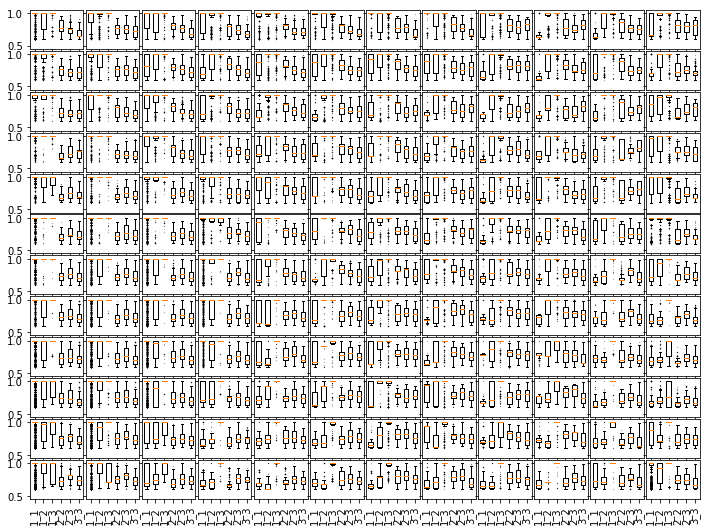

In [12]:
label_plot(book, get_shape(book), figsize=(12,9), xtick_rotation=90, save='Images/Consensus_Level_Example.png')